# Motivação

<div style="font-size:18px;">

Suponha que tenhamos um conjunto $D$ de observações, tal que $$D = (\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), \cdots, (\mathbf{x}_N, y_N)$$

Seja cada vetor de entrada $$\mathbf{x}_i = x_1, x_2, \cdots, x_d$$

Talvez seja de nosso interesse modelar uma função $f$ que calcule a saída correta para qualquer entrada, ou seja, $f(\mathbf{x}) = y$, $\forall \mathbf{x}$ em $\mathbb{F}^d$.

Por vezes, tal modelagem não é viável de ser executada determinísticamente. Considere, por exemplo, que $\mathbf{x}$ seja um vetor de informações sobre um aluno, e $y$ seja a nota que ele irá tirar em uma prova. Por mais que você possa ter certas intuições sobre o relacionamento entre as variáveis, por exemplo, quanto mais horas de estudo maior tende a ser a nota, é difícil conseguir encontrar uma resposta exata para qualquer entrada.

Para tais tipos de problemas utilizamos algoritmos de Machine Learning, ou seja, um algoritmo que permita que a máquina encontre, a partir das observações, dentre o conjunto de todas as possíveis funções $h(\mathbf{x})$, a função $g(\mathbf{x})$ o mais próxima possível da função hipotética $f(\mathbf{x})$.
</div>

# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gerando um Conjunto de Dados

<div style="font-size:18px;">

Vamos gerar um conjunto de dados onde as variáveis sejam propositalmente relacionadas, a partir de um conjunto de pesos específicados.

Após isso, adicionamos um ruído pseudo-aleatório nos dados para amenizar dar um efeito mais realista.
</div>

In [3]:
def gen_dataset():
    N = 200
    weights = np.array([2.0, 3.0, -1.0]) # w0, w1, w2
    noise_rate = 2.0
    np.random.seed(13)

    x1_x2 = np.random.rand(N, 2) * 10
    X = np.c_[np.ones(N), x1_x2]
    y_init = np.matmul(X, weights)
    noise = np.random.randn(N) * noise_rate
    y = y_init + noise

    dataset = pd.DataFrame({
        'x0': X[:, 0],
        'x1': X[:, 1],
        'x2': X[:, 2],
        'y': y
    })

    return dataset

--- Dataset Gerado (com ruído) ---
    x0        x1        x2          y
0  1.0  7.777024  2.375412  24.954708
1  1.0  8.242785  9.657492  17.749107
2  1.0  9.726011  4.534492  25.945103
3  1.0  6.090425  7.755265  14.203693
4  1.0  6.416133  7.220182  15.512019

Gerando o gráfico 3D do dataset...


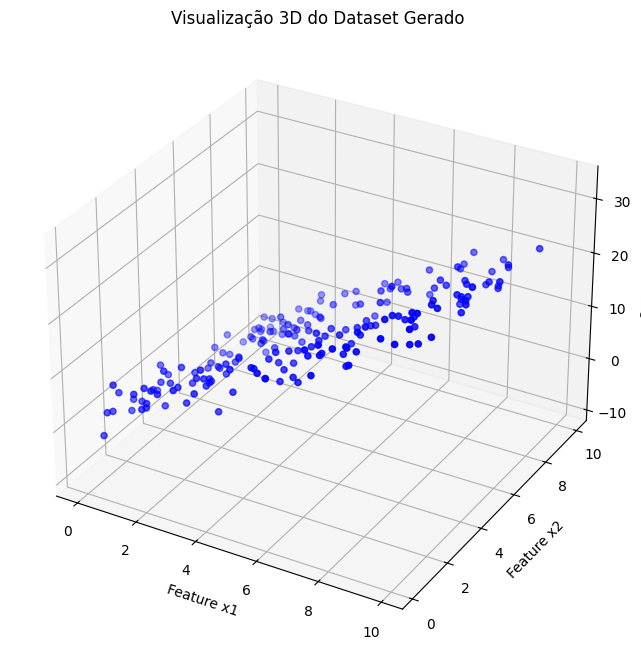

In [4]:
dataset = gen_dataset()

print("--- Dataset Gerado (com ruído) ---")
print(dataset.head())

print("\nGerando o gráfico 3D do dataset...")

# Cria a figura e um eixo 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plota os pontos usando um gráfico de dispersão (scatter plot)
ax.scatter(dataset['x1'], dataset['x2'], dataset['y'], color='blue')

# Adiciona rótulos aos eixos para clareza
ax.set_xlabel('Feature x1')
ax.set_ylabel('Feature x2')
ax.set_zlabel('Output y')

# Adiciona um título ao gráfico
ax.set_title('Visualização 3D do Dataset Gerado')

# Mostra o gráfico
plt.show()

# O Algoritmo de Regressão Linear

<div style="font-size:18px;">

O algoritmo de regressão linear nos permite calcular uma função linear que aproxima o comportamento dos dados a partir das observações.

Na regressão linear, estamos buscando minimizar o erro quadrático $(h(\mathbf{x}) - f(\mathbf{x}))²$ para quaisquer $\mathbf{x}$ fora do conjunto de observações.

$$E_{\text{out}}(h) = \mathbb{E}[(h(\mathbf{x}_n) - y_n)²]$$

Como não temos acesso a distribuição de probabilidade $P(\mathbf{x}, y)$ que gera os dados, só podemos nos basear nas observações.

O erro médio das observações é:
$$E_{\text{in}}(h) = \frac{1}{N} \sum_{n = 1}^{N} (h(\mathbf{x}_n) - y_n)²$$

Como a função retornada $h$ é uma função linear dos elementos de $\mathbf{x}$, temos:

$$h(\mathbf{x}) = \sum_{i = 0}^{d} w_i x_i = \mathbf{w}^T \mathbf{x}$$

Desenvolvendo a expressão $E_{\text{in}}$, teremos:

$$E_{\text{in}}(h) = \frac{1}{N} \sum_{n = 1}^{N} (h(\mathbf{x}_n) - y_n)² = \frac{1}{N} ||X \mathbf{w} - \mathbf{y}||²$$

Podemos encarar a matrix de entradas $X$ e o vetor de saídas $\mathbf{y}$ como constantes, e então minimizar o erro utilizando o vetor de pesos $\mathbf{w}$ como variável.

Para isso, iremos calcular o grandiente de $E_{\text{in}}(\mathbf{w})$:

$$\nabla E_{\text{in}}(\mathbf{w}) = \frac{2}{N} X^T(X \mathbf{w} - \mathbf{y})$$

Como queremos que esse gradiente seja $0$, temos:

$$X^T X \mathbf{w} = X^T \mathbf{y}$$

Assim temos:

$$\mathbf{w} = X^\dagger \mathbf{y},$$

Onde $$X^\dagger = (X^T X)^{-1} X^T$$

O retorno da função de regressão linear é o vetor de pesos $\mathbf{w}$.
</div>

In [5]:
def lin_reg(dataset):
    X = dataset[['x0', 'x1', 'x2']].to_numpy()
    y = dataset['y'].to_numpy()

    # Criando a matriz pseudo-inversa
    X_p_i = np.matmul(np.linalg.inv((np.matmul(np.transpose(X), X))), np.transpose(X))

    # Retornando os pesos (w_lin)
    w_lin = np.matmul(X_p_i, y)

    return w_lin, X, y, X_p_i

<div style="font-size:18px;">

A partir dos pesos $\mathbf{w}$, podemos gerar o plano correspondente a função linear $g(\mathbf{x})$.
</div>

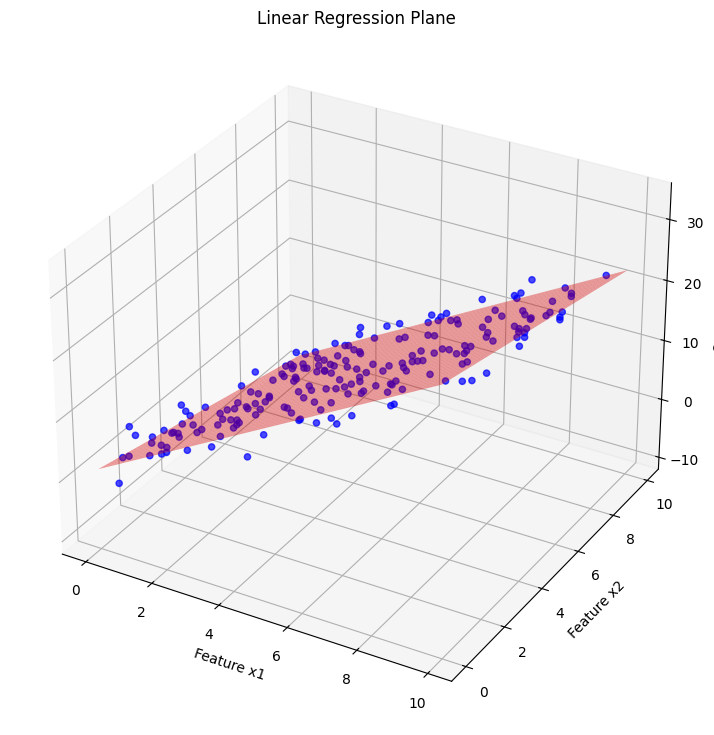

In [6]:
weights, X, y, X_p_i = lin_reg(dataset)

y_new = np.matmul(X, weights)

x1_surf = np.arange(0, 10, 0.1) # Range
x2_surf = np.arange(0, 10, 0.1) # Range
xx1, xx2 = np.meshgrid(x1_surf, x2_surf)

X_surf = np.c_[np.ones(xx1.size), xx1.flatten(), xx2.flatten()]

y_surf_flat = np.matmul(X_surf, weights)

y_surf = y_surf_flat.reshape(xx1.shape)

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 1], X[:, 2], dataset['y'], color='blue', alpha=0.7)
ax.plot_surface(xx1, xx2, y_surf, color='red', alpha=0.4)
ax.set_xlabel('Feature x1')
ax.set_ylabel('Feature x2')
ax.set_zlabel('Output y')
ax.set_title('Linear Regression Plane')
plt.show()


# Algoritmo Iterativo (Gradient Descent)

Iter 0: loss=28.3814, w=[0.55171648 0.00579758]
Iter 100: loss=0.1038, w=[2.51929804 2.95139351]
Iter 200: loss=0.1031, w=[2.4786047  2.98414378]
Iter 300: loss=0.1031, w=[2.47183504 2.98959204]
Iter 400: loss=0.1031, w=[2.47070885 2.9904984 ]
Iter 500: loss=0.1031, w=[2.47052151 2.99064918]
Iter 600: loss=0.1031, w=[2.47049034 2.99067426]
Iter 700: loss=0.1031, w=[2.47048515 2.99067843]
Iter 800: loss=0.1031, w=[2.47048429 2.99067913]
Iter 900: loss=0.1031, w=[2.47048415 2.99067924]

Pesos finais (bias, slope): [2.47048412 2.99067926]


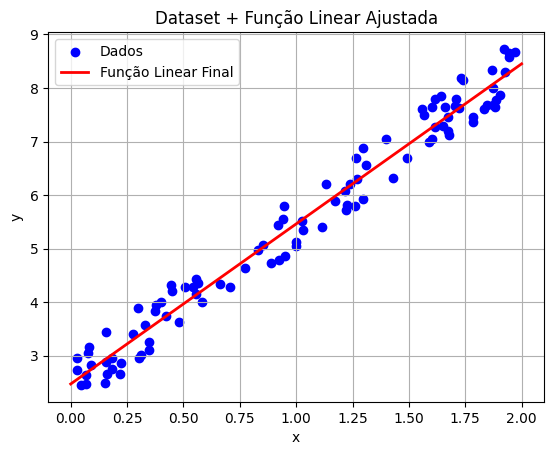

In [7]:
np.random.seed(34)
x = 2 * np.random.rand(100, 1)
# Reta real é y = 3x + 2 + ruído
y = 3 * x + 2 + np.random.rand(100, 1)

# Adiciona a coluna de 1s para o bias (intercepto)
x_b = np.c_[np.ones((100, 1)), x]
# Inicializa os pesos aleatoriamente
w = np.random.randn(2, 1)

def mse_loss(x, y ,w):
  n = len(y)
  y_pred = x.dot(w)
  # CORREÇÃO 2: Implementação correta do MSE (média dos erros ao quadrado)
  loss = (1/n) * np.sum((y_pred - y)**2)
  return loss

def gradient_descendent(x, y, w, alpha=0.1, n_iters=1000): # n_iters reduzido para 1000 para ser mais rápido
  n = len(y)
  losses = []
  for i in range(n_iters):
    y_pred = x.dot(w)
    # Gradiente do MSE (1/n * X^T * (Y_pred - Y))
    grad = (1/n) * x.T.dot(y_pred - y)
    # Atualiza os pesos
    w = w - alpha * grad

    # Calcula e armazena a perda
    loss = mse_loss(x, y, w)
    losses.append(loss)

    if i % 100 == 0:
      print(f"Iter {i}: loss={loss:.4f}, w={w.ravel()}")


  return w, losses

# ================================
# 5. Rodar o treinamento
# ================================
# n_iters ajustado para 1000
w_final, losses = gradient_descendent(x_b, y, w, alpha=0.1, n_iters=1000)

print("\nPesos finais (bias, slope):", w_final.ravel())

# ================================
# Plotagem
# ================================
plt.scatter(x, y, color='blue', label="Dados")
x_line = np.array([0, 2])

#y = w[0] (bias) + x * w[1] (slope)
y_pred_line = w_final[0] + x_line * w_final[1]

plt.plot(x_line, y_pred_line, color='red', linewidth=2, label="Função Linear Final")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dataset + Função Linear Ajustada")
plt.legend()
plt.grid(True)
plt.show()

# Regressão Logística



<div style="font-size:18px;">

A regressão logística busca retornar uma **probabilidade** da ocorrência de um evento ao invés de um valor numérico, como no caso da regressão linear.

Queremos achar uma função $f(x)$ tal que:

$$
P(y|\mathbf{x}) =
\begin{cases}
  f(\mathbf{x}), & \text{se } y = 1, \\
  1 - f(\mathbf{x}), & \text{se } y = 0
\end{cases}
$$

Realizando algumas manipulações álgebricas, conseguimos chegar em:

$$
    P(y|\mathbf{x}) = f(\mathbf{x})^y[1-f(\mathbf{x})]^{1-y}
$$

Para aproximarmos essa função, utilizaremos uma família de funções do mesmo tipo. Considere a função:

$$
    \theta(z)=\frac{1}{1+e^{-z}} = \frac{e^z}{e^z + 1}, z = \mathbf{w}^T\mathbf{\tilde{x}}
$$

Juntando tudo teremos:

$$
    h_{\mathbf{w}}(\mathbf{x}) = \theta(\mathbf{w}^T\mathbf{\tilde{x}})
$$

Uma função de $\mathbb{R}^d$ em $[0,1]$, do mesmo tipo de $f$.

A partir da fórmula que chegamos para $P(y|\mathbf{x})$, definimos a função de perda como:

$$
L(D; \mathbf{w}) = \prod_{(\mathbf{x}, y) \in D} P(\mathbf{x}) [\theta(\mathbf{w}^T \tilde{\mathbf{x}})]^y [1 - \theta(\mathbf{w}^T \tilde{\mathbf{x}})]^{1-y}
$$

Essa função pode ser reescrita como:

$$
L(D; h) = \prod_{n=1}^{N} P(\mathbf{x}^{(n)}) \underbrace{h(\mathbf{x}^{(n)})^{y^{(n)}} [1 - h(\mathbf{x}^{(n)})]^{1-y^{(n)}}}_{P(y^{(n)}|\mathbf{x}^{(n)})}
$$

Após realizarmos algumas manipulações, a função de perda que devemos otimizar, conhecida por binary cross-entropy, é:

$$
\mathcal{L}(\mathbf{w}) = -\frac{1}{N} \sum_{n=1}^{N} \left[ y^{(n)} \ln \hat{y}^{(n)} + (1-y^{(n)}) \ln(1-\hat{y}^{(n)}) \right]
$$

em que

$$
\hat{y} = h_{\mathbf{w}}(\tilde{\mathbf{x}}) = \theta(\mathbf{w}^T \tilde{\mathbf{x}}) = \frac{1}{1 + e^{-\mathbf{w}^T \tilde{\mathbf{x}}}}
$$

As derivadas parciais de $\mathcal{L}$ com respeito a cada um dos $d+1$ pesos, $w_j$, é dada por:

$$
\frac{\partial}{\partial w_j} \mathcal{L}(\mathbf{w}) = \sum_{n=1}^{N} (\hat{y}^{(n)} - y^{(n)}) x_j^{(n)}
$$

Portanto, os pesos devem ser atualizados proporcionalmente ao negativo do gradiente, que é dado como segue para $j = 0, 1, \ldots, d$:

$$
\Delta w_j = \sum_{n=1}^{N} \left[ y^{(n)} - \hat{y}^{(n)} \right] \tilde{\mathbf{x}}_j^{(n)}
$$


Pesos finais (bias, slope): [-8.27944377  0.35427775]


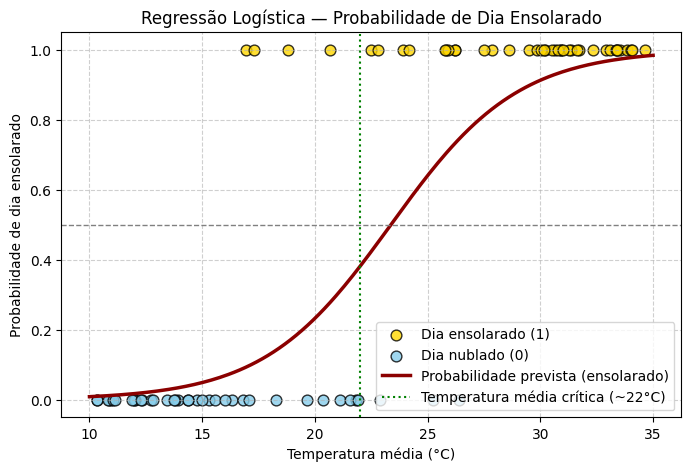

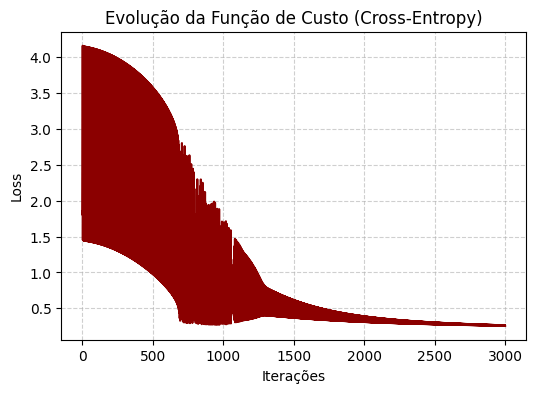

In [8]:
# Logistic Regression
# ================================
# 1. Gerar dataset sintético — probabilidade de dia ensolarado
# ================================
np.random.seed(34)

# Temperaturas entre 10°C e 35°C
x = 10 + 25 * np.random.rand(80, 1)

# Probabilidade de ser ensolarado (sigmoide crescente)
def prob_solar(temp):
    return 1 / (1 + np.exp(-0.4 * (temp - 22)))  # ponto médio ≈ 22°C

# Gerar rótulos binários baseados na probabilidade
p = prob_solar(x)
y = (np.random.rand(80, 1) < p).astype(int)  # 1 = ensolarado, 0 = nublado

# Adiciona a coluna de 1s (bias)
x_b = np.c_[np.ones((80, 1)), x]

# Inicializa pesos
w = np.random.randn(2, 1)


# ================================
# 2. Funções auxiliares
# ================================
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_loss(x, y, w):
    n = len(y)
    y_pred = sigmoid(x.dot(w))
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return - (1/n) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def gradient_descent_logistic(x, y, w, alpha=0.05, n_iters=3000):
    n = len(y)
    losses = []
    for i in range(n_iters):
        y_pred = sigmoid(x.dot(w))
        grad = (1/n) * x.T.dot(y_pred - y)
        w -= alpha * grad
        losses.append(logistic_loss(x, y, w))
    return w, losses


# ================================
# 3. Treinamento
# ================================
w_final, losses = gradient_descent_logistic(x_b, y, w, alpha=0.05, n_iters=3000)
print("\nPesos finais (bias, slope):", w_final.ravel())


# ================================
# 4. Visualização dos dados e da sigmoide
# ================================
plt.figure(figsize=(8,5))
plt.scatter(x[y==1], y[y==1], color='gold', label="Dia ensolarado (1)", s=60, alpha=0.8, edgecolor='black')
plt.scatter(x[y==0], y[y==0], color='skyblue', label="Dia nublado (0)", s=60, alpha=0.8, edgecolor='black')

x_line = np.linspace(10, 35, 200).reshape(-1, 1)
x_line_b = np.c_[np.ones((200, 1)), x_line]
y_pred_prob = sigmoid(x_line_b.dot(w_final))

plt.plot(x_line, y_pred_prob, color='darkred', linewidth=2.5, label="Probabilidade prevista (ensolarado)")
plt.axhline(0.5, color='gray', linestyle='--', linewidth=1)
plt.axvline(22, color='green', linestyle=':', linewidth=1.5, label="Temperatura média crítica (~22°C)")
plt.xlabel("Temperatura média (°C)")
plt.ylabel("Probabilidade de dia ensolarado")
plt.title("Regressão Logística — Probabilidade de Dia Ensolarado")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# ================================
# 5. Curva de perda
# ================================
plt.figure(figsize=(6,4))
plt.plot(losses, color='darkred')
plt.xlabel("Iterações")
plt.ylabel("Loss")
plt.title("Evolução da Função de Custo (Cross-Entropy)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()